In [1]:
import gefera as gf
from test_grad_reparam import *
from test_reparam import *
import matplotlib.pyplot as plt
import numpy as np


['orbits.py', 'animate.py', '__pycache__', 'keplib.cpython-310-x86_64-linux-gnu.so', 'conflib.cpython-310-x86_64-linux-gnu.so', 'phot.py', 'reparam.py', '__init__.py', 'hrchlib.cpython-310-x86_64-linux-gnu.so', 'photlib.cpython-310-x86_64-linux-gnu.so', 'systems.py', 'kep.py', '.ipynb_checkpoints', 'grad_reparam.py']


In [2]:
old = {
'ap':215.0,     #semi-major axis
'tp':-91.25,    #time of periastron passage
'ep':0,       #eccentricity
'pp':365,       #orbital period
'wp':0.1*np.pi / 180,    #argument of periastron
'ip':89.8 * np.pi / 180,   #inclination
'am':2,
'tm': -4.2,
'em' : 0,
'pm' : 8,
'om' :90 * np.pi / 180,    #longitude of asending node (in radians)
'wm' : -90 * np.pi / 180,
'im' : 90.0 * np.pi / 180,
'mm' : 0.01,    #moon/planet mass ratio
'rp' : 0.1,
'rm' : 0.05,
'u1' : 0.5,
'u2' : 0.3
}


In [3]:
ap,tp,ep,pp,wp,ip,am,tm,em,pm,om,wm,im,mm,r1,r2,u1,u2 = old.values()

In [20]:
new = {
    'T':def_T(ep,pp,wp,ap,ip),
    't0':t0(ep,wp,pp,tp),
    'b1':b(ap,ip,ep,wp),
    'r1':r1,
    'phi':phi(tm,pm),
    'm2':mm,
    'r2':r2,
    'a2':am,
    'b2':b(am,im,em,wm),
    'P1':pp,
    'P2':pm,
    'e1cosw1':ep*np.cos(wp),
    'e2cosw2':em*np.cos(wm),
    'e1sinw1':ep*np.sin(wp),
    'e2sinw2':em*np.sin(wm),
    'o2':om,
    'u1':u1,
    'u2':u2

}

In [21]:
T,my_t0,b1,r1,my_phi,m2,r2,a2,b2,p1,p2,e1cosw,e2cosw,e1sinw,e2sinw,o2,u1,u2 = new.values()

In [22]:
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(-275,-272,10000)
flux1, grad = sys.lightcurve(t, u1, u2, r1,r2, grad=True)

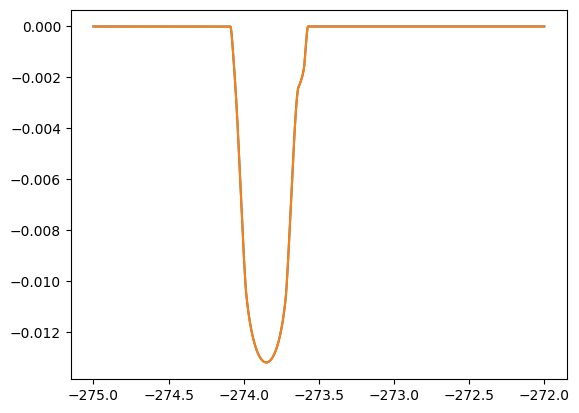

In [24]:
plt.plot(t,flux1)
plt.plot(t2,flux)

In [9]:
nold = {
    'ap':a1(p1,b1,T,e1cosw,e1sinw),     #semi-major axis
    'tp':t1(my_t0,p1,e1cosw,e1sinw),    #time of periastron passage
    'ep':ecc(e1cosw,e1sinw),       #eccentricity
    'pp':p1,       #orbital period
    'wp':omega(e1cosw,e1sinw),    #argument of periastron
    'ip':i1(b1,p1,T,e1cosw,e2cosw),   #inclination
    'am':a2,
    'tm': t2(my_phi,p2),
    'em' : ecc(e2cosw,e2sinw),
    'pm' : p2,
    'om' :o2,    #longitude of asending node (in radians)
    'wm' : omega(e2cosw,e2sinw),
    'im' : i2(b2,a2,e2cosw,e2sinw),
    'mm' : m2,    #moon/planet mass ratio
    'rp' : r1,
    'rm' : r2,
    'u1' : u1,
    'u2' : u2
}
ap,tp,ep,pp,wp,ip,am,tm,em,pm,om,wm,im,mm,r1,r2,u1,u2 = nold.values()

In [10]:
nnew = {
    'T':def_T(ep,pp,wp,ap,ip),
    't0':t0(ep,wp,pp,tp),
    'b1':b(ap,ip,ep,wp),
    'r1':r1,
    'phi':phi(tm,pm),
    'm2':mm,
    'r2':r2,
    'a2':am,
    'b2':b(am,im,em,wm),
    'P1':pp,
    'P2':pm,
    'e1cosw1':ep*np.cos(wp),
    'e2cosw2':em*np.cos(wm),
    'e1sinw1':ep*np.sin(wp),
    'e2sinw2':em*np.sin(wm),
    'o2':om,
    'u1':u1,
    'u2':u2

}
T,my_t0,b1,r1,my_phi,m2,r2,a2,b2,p1,p2,e1cosw,e2cosw,e1sinw,e2sinw,o2,u1,u2 = nnew.values()

In [17]:
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t2 = np.linspace(-275,-272,10000)
flux, grad = sys.lightcurve(t2, u1, u2, r1,r2, grad=True)

In [18]:
my_t0

-273.85138888888895

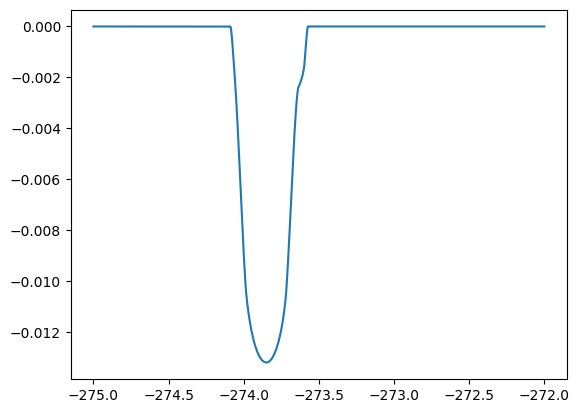

In [19]:
plt.plot(t2,flux)

In [7]:
old['wp'],nold['wp']

(0.0017453292519943296, 0.0)

In [8]:
old['wm'],nold['wm']

(-1.5707963267948966, 0.0)